In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config = "Config_file/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "Frozen_model/frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config)

In [4]:
labels = []
file_name = "coco_labels.txt"
with open(file_name, "rt") as f:
    labels = f.read().rstrip("\n").split("\n")

In [5]:
print("No. of classes in coco dataset are {}.".format(len(labels)))
labels

No. of classes in coco dataset are 80.


['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [6]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 00000223C9699330>

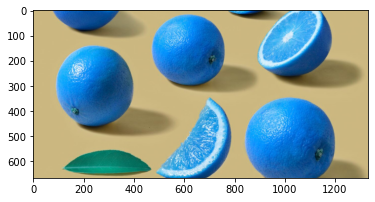

In [7]:
img_path = "inputs/or1.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

**Detection**

In [8]:
class_idx, confidence, bbox = model.detect(img, confThreshold = 0.6)

In [9]:
class_idx

array([[55],
       [55],
       [55],
       [55],
       [55]], dtype=int32)

In [10]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for idx, conf, box in zip(class_idx.flatten(), confidence.flatten(), bbox):
    if(idx<80 and labels[idx-6] == "orange"):
        cv2.rectangle(img, box, (0, 0, 255), 2)
        cv2.putText(img, labels[idx-6], (box[0]+10, box[1]+10), font, font_scale, (0,255,0), thickness = 3)

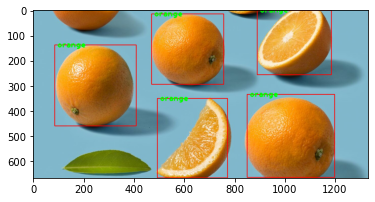

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))